# Proyecto final sprint 6 - Descripción del proyecto

Trabajas para la tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Paso 1: Carga de archivo de datos y exploración incial del dataset

Se inicia con la carga del conjunto de datos, y la exploración inicial del mismo. Las herramientas a utilizar son:

- Importación de librerías a utilizar.
- Lectura del archivo de datos.
- Exploración inicial, se utilizan las siguientes herramientas para obtener información acerca del dataset:

    * `'sample()'`: para obetner una muestra aleatoria de los datos.
    * `'info()'`: para obtener una descripción general del dataset.
    * `'dtypes'`: para obterner información acerca del tipo de datos de las columnas del dataset.
    * `'describe()'`: para revisar valores de tipo numérico.

### Inicialización

In [54]:
# Se cargan todas la librerías
import pandas as pd
import numpy as np
import math as mt
import datetime as dt
import plotly.express as px
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt

### Cargar datos

In [55]:
games = pd.read_csv('/home/necho/Documentos/cursos/triple_ten/data_analyst_bootcamp/modulo_1/sprint_6/proyecto_final/games.csv')

### Exploración inicial

In [56]:
# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'games': \n")
print(games.sample(n= 5))
print()

# Se lee la infomación general del dataset
print("-- Información general del dataset 'games': \n")
games.info()
print()

# Se validan los tipos de datos de las columnas
print("-- Tipos de datos del dataset: \n")
print(games.dtypes)
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(games.describe())
print()

# Se muestran los datos de la columna 'User_Score'
print(f"-- Valores únicos en la columna 'User_Score':\n\n {games['User_Score'].unique()}")
print()

# Se imprime una muestras de los registros del dataset
print("-- Una muestra de los datos del dataset 'games' con valor 'tbd' en la columna 'User_Score':\n")
print(games[games['User_Score'] == 'tbd'].head(5))
print()

-- Una muestra de los datos del dataset 'games': 

                            Name Platform  Year_of_Release    Genre  NA_sales  \
8227   Major League Baseball 2K6       GC           2006.0   Sports      0.13   
2296                    Crysis 3     X360           2013.0  Shooter      0.51   
16270               Hyakka Yakou      PSV           2015.0   Action      0.00   
16648               Mushi Bugyou      3DS           2013.0   Action      0.00   
3887       HSX HyperSonic.Xtreme      PS2           2002.0   Racing      0.25   

       EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
8227       0.03      0.00         0.00          66.0        tbd      E  
2296       0.31      0.01         0.08          76.0        6.7      M  
16270      0.00      0.01         0.00           NaN        NaN    NaN  
16648      0.00      0.01         0.00           NaN        NaN    NaN  
3887       0.20      0.00         0.07          53.0        8.4      E  

-- Información general 

### Hallazgos

Luego de la exploración inicial del dataset se encontró lo siguiente:

- Hay que normalizar los títulos de las columnas del dataset, se pasan a letras minúsculas.
- Existen valores ausentes en las columnas: `'Name'`, `'Year_of_Release'`, `'genre'`, `'Critic_Score'`, `'User_Score'` y `'Rating'`.
- Hay que cambiar el tipo de datos en las columnas:
    * `'Year_of_Release'`: debe ser de tipo entero.
    * `'User_Score'`: debe ser de tipo float.
- Algunos registros de la columna `'User_Score'` son de tipo texto, y tienen el valor: `'tbd'`.

## Paso 2: Preparar los datos

En esta parte se realizará la depuración de los datos, se abordarán las siguientes cuestiones:
- Normalización de los nombres de las columnas del dataset.
- Tratamiento de datos ausentes y normalización de los tipos de datos.
- Validación de datos duplicados.
- Calcular las ventas totales para cada juego.

### Normalización de los nombres de la columnas

- Se normaliza los nombres de las columnas del dataset. Se dejan todos los nombres en minúsculas.

In [57]:
# Se renombran las columnas del dataset para una mejor presentación
new_names_cols = {
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
}

games.rename(columns=new_names_cols, inplace=True)

print(f"-- Se valida que el cambio de nombres se haya aplicado correctamente:\n")
games.info()

-- Se valida que el cambio de nombres se haya aplicado correctamente:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Tipos de datos

Durante la exploración inicial de los datos se encontró que las siguientes columnas tienen tipos de datos que no corresponden:

- `'year_of_release'`: Esta columna está como tipo de datos `'float64'`, deber ser de tipo `'int64'`.
- `'user_score'`: Esta variable está como tipos de datos `'obejct'`, debe ser de tipo `'float64'`

### Valores ausentes

Durante la exploración inicial de los datos se encontró que las siguientes columnas tienen valores asuentes:
- `'name'`
- `'year_of_release'`
- `'genre'`
- `'crtic_score'`
- `'user_score'`
- `'rating'`

Como son varias las columnas que tienen valores ausentes, y cada columna representa y tiene tipos de datos diferentes, se va a tratar cada columna por separado y a decidir la mejor opción para resolver la falta de datos.

#### Valores ausentes columna `'name'`

In [58]:
# Se busca por valores ausentes en la columna 'name'
print(f"-- Cantidad de datos ausentes en la columna 'name': {games['name'].isna().sum()}")
print()

# Se observa cuales son los registros con valores ausentes
absent_names = games[games['name'].isna()]
print(absent_names)

-- Cantidad de datos ausentes en la columna 'name': 2

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


#####  Tratamiento valores ausentes columna `'name'`
- Se observa que existen dos registros con nombres asuentes en la columna `'name'`
- Los juegos fueron desarrollados para la misma plataforma y fueron lanzados el mismo año, en $1993$.
- Adicionalente no se cuenta con información de los puntajes ni del rating.
- Al ser solo dos registros, y que tienen otros campos de información faltantes, se decide eliminar los mismos.

In [59]:
# Se eliminan los registros con valores asuentes en la columna nombre y se reinician los índices del dataset
games.drop([659, 14244], axis=0, inplace=True)
games.reset_index(drop= True, inplace=True)

# Se busca por valores ausentes en la columna 'name'
print(f"-- Cantidad de datos ausentes en la columna 'name': {games['name'].isna().sum()}")
print()

# Se lee la infomación general del dataset
print("-- Se valida la información general del dataset 'games': \n")
games.info()
print()

-- Cantidad de datos ausentes en la columna 'name': 0

-- Se valida la información general del dataset 'games': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



#### Valores ausentes columna `'year_of_release'`

In [60]:
# Se busca por valores ausentes en la columna 'name'
print(f"-- Cantidad de datos ausentes en la columna 'year_of_release': {games['year_of_release'].isna().sum()}")
print()

# Se observa cuales son los registros con valores ausentes
absent_yor = games[games['year_of_release'].isna()]
print(absent_yor.head())

-- Cantidad de datos ausentes en la columna 'year_of_release': 269

                           name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN  


##### Tratamiento valores ausentes columna `'year_of_release'`
- Se observa que existen $269$ registros asuentes en la columna `'year_of_release'`.
- Se puede inferir el año de lanzamiento de algunos juegos de acuerdo al nombre. Por ejemplo: 
    * El juego `'FIFA Soccer 2004'` de acuerdo a su nombre fue lanzado en el año $2003$, por la costumbre de estrenar los juegos el año inmediatamente anterior.
- Para los registros a los cuales no se les pueda inferir el año de lanzamineto a partir del nombre, se decide completar dicha informaión con el valor `'1900'` para indicar que no se conoce el año de lanzamiento, pero que se necesita mantener los registros.

In [61]:
# Se filtra el dataframe 'absent_yor' para obtener los datos del nombre del juego
# y la columna de año de lanzamiento
absent_yor = absent_yor[['name', 'year_of_release']]
print(absent_yor.head(5))
print()

# Del nombre del juego se extrae la información del año (últimos 4 caracteres). Creando una lista.
year = absent_yor['name'].str[-4:]
print(f"-- Resultado de obtener los últimos cuatro caracteres del nombre del juego:\n{year.head(5)}")
print()

# Del objeto Series 'year', se obtiene el año con la ayuda de la función 'int()', y para el ítem que contiene texto se 
# reemplaza por le valor '1900'.
for i in year.index:
    if year[i].isnumeric():
        year[i] = int(year[i]) - 1  # Se le resta uno al año para obtener el año de lanzamiento del juego.
    else:
        year[i] = '1900'  # Sino hay un valor númerico se reemplaza por '1900'
        

# Ahora 'year' contiene los datos del año de lanzamiento de los juegos inferidos a partir de su nombre
# En los juegos en los cuales no se pudo obtener el año de lanzamiento a partir del nombre, dicha información
# se completó con el valor '1900'
print()
print(f"-- Resultado de completar 'year' con el año de lanzamiento:\n{year.head(5)}")
print()

# El objeto Series 'year' se utiliza para completar los datos ausentes en la columna 'year_of_release'
# del dataframe 'games'
games['year_of_release'] = games['year_of_release'].fillna(value=year)

# Se busca por valores ausentes en la columna 'year_of_release'
print(f"-- Cantidad de datos ausentes en la columna 'year_of_release': {games['year_of_release'].isna().sum()}")
print()

# Se valida que los cambios se hayan aplicado correctamente
names = ['Madden NFL 2004', 'FIFA Soccer 2004', 'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006', 'Space Invaders']
print(f"-- Se valida que los cambios se hayan aplicado correctamentes:\n{games[games['name'].isin(names)].head(5)}")
print()

# Información general del dataset 'games'
print("-- Información general del dataset 'games':")
games.info()

                           name  year_of_release
183             Madden NFL 2004              NaN
377            FIFA Soccer 2004              NaN
456  LEGO Batman: The Videogame              NaN
475  wwe Smackdown vs. Raw 2006              NaN
609              Space Invaders              NaN

-- Resultado de obtener los últimos cuatro caracteres del nombre del juego:
183    2004
377    2004
456    game
475    2006
609    ders
Name: name, dtype: object


-- Resultado de completar 'year' con el año de lanzamiento:
183    2003
377    2003
456    1900
475    2005
609    1900
Name: name, dtype: object



-- Cantidad de datos ausentes en la columna 'year_of_release': 0

-- Se valida que los cambios se hayan aplicado correctamentes:
                           name platform year_of_release   genre  na_sales  \
183             Madden NFL 2004      PS2            2003  Sports      4.26   
377            FIFA Soccer 2004      PS2            2003  Sports      0.59   
397  LEGO Batman: The Videogame     X360          2008.0  Action      2.04   
456  LEGO Batman: The Videogame      Wii            1900  Action      1.80   
460  LEGO Batman: The Videogame       DS          2008.0  Action      1.75   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
397      1.02      0.00         0.32          76.0        7.9   E10+  
456      0.97      0.00         0.29          74.0        7.9   E10+  
460      1.01      0.00         0.29          7

##### Conversión del tipo de dato de la columna `'year_of_release'`
- Como se mencionó en la etapa de preparación de datos, para esta columna es necesario convertir su tipo de datos, de `'float64'` a `'int64'`, para que represente adecuadamente la información.

In [62]:
# Se lee la infomación general del dataset
print("-- Información general del dataset 'games': \n")
games.info()
print()

# Se realiza el cambio del tipo de dato en la columna 'year_of_release'
games['year_of_release'] = games['year_of_release'].astype('int')

# Se lee la infomación general del dataset para validar el cambio del tipo de datos
print("-- Información general del dataset 'games': \n")
games.info()
print()

-- Información general del dataset 'games': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB

-- Información general del dataset 'games': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  D

#### Valores ausentes columna `'genre'`

In [63]:
# Se busca por valores ausentes en la columna 'genre'
print(f"-- Cantidad de datos ausentes en la columna 'genre': {games['genre'].isna().sum()}")
print()

# Se observa cuales son los registros con valores ausentes
absent_yor = games[games['genre'].isna()]
print(absent_yor.head())

-- Cantidad de datos ausentes en la columna 'genre': 0

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


##### Tratamiento valores ausentes columna `'genre'`
- Los valores ausentes en `'genre'` coincidían con los valores ausentes en la columna `'name'`, al eliminar dichas filas, también se eliminaron los registros ausentes de la columna `'genre'`.

#### Valores ausentes columna `'critic_score'`

In [64]:
# Se busca por valores ausentes en la columna 'critic_score'
print(f"-- Cantidad de datos ausentes en la columna 'critic_score': {games['critic_score'].isna().sum()}")
print()

# Se observa cuales son los registros con valores ausentes
absent_cs = games[games['critic_score'].isna()]
print(f"-- Muestra del listado de los valores presentes en la columna 'critic_score':\n{absent_cs.head(5)}")
print()

print(f"-- Muestra del listado de los valores presentes en la columna 'critic_score':\n{games['critic_score'].value_counts().head(10)}")

-- Cantidad de datos ausentes en la columna 'critic_score': 8576

-- Muestra del listado de los valores presentes en la columna 'critic_score':
                        name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95 

##### Tratamiento valores ausentes columna `'critic_score'`
- Se observa que existen $8576$ registros ausentes en la columna `'critic_score'`.
- Son muchos los datos faltantes, aproximadamente el $51\%$ de los datos para la columna.
- La calificación puede variar dependiendo de la plataforma, pero también puede variar dependiendo del género del juego.
- Existen plataformas de juegos para las cuales no se tiene registro del `'score_critics'`.
- La ausencia de estos datos se puede presentar a que en cierto tiempo no se tomaba el registro, caso de algunas plataformas para las cuales no existe esta puntuación, y en otros casos deben ser registros perdidos al procesar los datos desde el origen.
- Teniendo en cuenta lo anterior, no se realiza ninguna acción sobre los valores ausentes.
- Los datos ausentes no se tendran en cuenta para los análisis.

In [65]:
# Se agrupan los juego por 'platform' y se calcula la media e 'critic_score'.
# Se observan alguna plataformas para las cuales no existe puntuación.
platforms_avg = games.groupby('platform')['critic_score'].mean().sort_values(ascending=False)
platforms_median = games.groupby('platform')['critic_score'].median().sort_values(ascending=False)

print(f"-- La media de 'critic_score' por plataforma es:\n\n{platforms_avg}")
print()

-- La media de 'critic_score' por plataforma es:

platform
DC      87.357143
PC      75.928671
XOne    73.325444
PS4     72.091270
PS      71.515000
PSV     70.791667
WiiU    70.733333
PS3     70.382927
XB      69.859310
GC      69.488839
PS2     68.727273
X360    68.616812
PSP     67.424242
GBA     67.372146
3DS     67.101190
DS      63.761506
Wii     62.823932
2600          NaN
3DO           NaN
GB            NaN
GEN           NaN
GG            NaN
N64           NaN
NES           NaN
NG            NaN
PCFX          NaN
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Name: critic_score, dtype: float64



#### Valores ausentes columna `'user_score'`

In [66]:
# Se busca por valores ausentes en la columna 'user_score'
print(f"-- Cantidad de datos ausentes en la columna 'user_score': {games['user_score'].isna().sum()}")
print()

# Se observa cuales son los registros con valores ausentes
absent_us = games[games['user_score'].isna()]
print(f"-- Una lista de los registros con valores ausentes en la columna 'user_score':\n{absent_us.head(5)}")
print()

print(f"-- Muestra del listado de los valores presentes en la columna 'user_score':\n{games['user_score'].value_counts().head(5)}")

-- Cantidad de datos ausentes en la columna 'user_score': 6699

-- Una lista de los registros con valores ausentes en la columna 'user_score':
                        name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95  

##### Tratamiento valores ausentes columna `'user_score'`
- Se observa que existen $6699$ registros ausentes en la columna `'user_score'`.
- Adicionalmente existen algunos registros completados con el string `'tbd'`.
- Considerando los dos casos,  son muchos los datos faltantes, aproximadamente el $54\%$ de los datos para la columna.
- Para los datos completados con el string `'tbd'` se procede a reemplazarlos por datos ausentes, ya que no se tiene registro de los mismos.
- La calificación de los usuarios puede variar dependiendo de la plataforma, pero también puede variar dependiendo del género del juego.
- Existen plataformas de juegos para las cuales no se tiene registro del `'user_score'`.
- La ausencia de estos datos se puede presentar a que en cierto tiempo no se tomaba el registro, caso de algunas plataformas para las cuales no existe esta puntuación, y en otros casos deben ser registros perdidos al procesar los datos desde el origen, y también existe la posibilidad que el desarrolador del juego no comparta esta información.
- Teniendo en cuenta lo anterior, no se realiza ninguna acción sobre los valores ausentes.
- Los datos ausentes no se tendrán en cuenta para los análisis.

In [67]:
# Se agrupan los juego por 'platform' y se calcula la cantidad de puntuaciones para cada plataforma.
# Se observan alguna plataformas para las cuales no existe puntuación.
platforms_count_score = games.groupby('platform')['user_score'].count().sort_values(ascending=False)

print(f"-- La cantidad de reseñas de usuario por plataforma es:\n\n{platforms_count_score}")
print()

# Se reemplazan los registros completado con 'tbd' por datos ausentes
games['user_score'] = games['user_score'].replace('tbd', np.nan)

# Se valida que no esté presente el string 'tbd' enter los valores de la columna 'user_score'
print(f"-- Muestra del listado de los valores presentes en la columna 'user_score':\n{games['user_score'].value_counts().head(5)}")
print()

# Se valida que efectivamente el número de valores ausentes en la columna 'user_score' aumente
print(f"-- Cantidad de datos ausentes en la columna 'user_score': {games['user_score'].isna().sum()}")
print()

-- La cantidad de reseñas de usuario por plataforma es:

platform
PS2     1481
DS      1272
X360    1050
Wii     1000
PS3      964
PC       819
XB       736
PSP      544
GBA      517
GC       469
PS4      263
3DS      230
PS       207
XOne     193
PSV      150
WiiU     105
DC        14
PCFX       0
SNES       0
GB         0
GEN        0
WS         0
TG16       0
SCD        0
3DO        0
SAT        0
GG         0
N64        0
NES        0
NG         0
2600       0
Name: user_score, dtype: int64

-- Muestra del listado de los valores presentes en la columna 'user_score':
user_score
7.8    324
8      290
8.2    282
8.3    254
8.5    253
Name: count, dtype: int64

-- Cantidad de datos ausentes en la columna 'user_score': 9123



##### Conversión del tipo de dato de la columna `'user_score'`
- Como se mencionó en la etapa de preparación de datos para esta columna es necesario convertir su tipo de datos, de `'obejct'` a `'float'`, para que represente adecuadamente la información.

In [68]:
# Se lee la infomación general del dataset
print("-- Información general del dataset 'games': \n")
games.info()
print()

# Se realiza el cambio del tipo de dato en la columna 'year_of_release'
games['user_score'] = games['user_score'].astype('float')

# Se lee la infomación general del dataset para validar el cambio del tipo de datos
print("-- Información general del dataset 'games': \n")
games.info()
print()

-- Información general del dataset 'games': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB

-- Información general del dataset 'games': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Nul

#### Valores ausentes columna `'rating'`

In [69]:
# Se busca por valores ausentes en la columna 'rating'
print(f"-- Cantidad de datos ausentes en la columna 'rating': {games['rating'].isna().sum()}")
print()

# Se observa cuales son los registros con valores ausentes
absent_r = games[games['rating'].isna()]
print(f"-- Una lista de los registros con valores ausentes en la columna 'user_score':\n{absent_r.head(5)}")
print()

print(f"-- Muestra del listado de los valores presentes en la columna 'ratin':\n{games['rating'].value_counts()}")

-- Cantidad de datos ausentes en la columna 'rating': 6764

-- Una lista de los registros con valores ausentes en la columna 'user_score':
                        name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95 

##### Tratamiento valores ausentes columna `'rating'`
- Se observa que existen $6764$ registros ausentes en la columna `'rating'`.
- Son muchos los datos faltantes, aproximadamente el $40\%$ de los datos para la columna.
- Existe una categoría dentro de la ESRB para los juegos llamada `'RP (Rating Pending)'` o clasificación pendiente. Esta categoría se utiliza para completar los datos faltantes en esta columna.

In [70]:
# Se completan los valores ausentes en la columna 'ratingo' con el valor 'RP'
games['rating'] = games['rating'].fillna(value='RP')

# Se busca de nuevo por valores ausentes en la columna 'rating'
print(f"-- Cantidad de datos ausentes en la columna 'rating': {games['rating'].isna().sum()}")
print()

# Se valida que el nuevo valor esté presente dentro de la columna
print(f"-- Muestra del listado de los valores presentes en la columna 'rating':\n{games['rating'].value_counts()}")
print()

# Se muestra la información general del dataset
games.info()

-- Cantidad de datos ausentes en la columna 'rating': 0

-- Muestra del listado de los valores presentes en la columna 'rating':
rating
RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(

#### Valores duplicados

- Solo se valida si existen filas con valores idénticos.
- Los nombres de los juegos, las plataformas, los géneros y la clasificación son valores que se pueden repetir.

In [71]:
duplicated_games = games.duplicated().sum()
print(f"-- Total de filas duplicadas en el dataset 'games': {duplicated_games}")
print()

-- Total de filas duplicadas en el dataset 'games': 0



#### Cálculo de las ventas totales

- Se realiza el cálculo de las ventas totales para cada vídeo juego.

In [72]:
# Se calculan las ventas totales para cada video juego
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


# Se valida que la columna se haya creado correctamente
print(f"-- Una muestra de los registros del dataset:\n{games.head(5)}")
print()

print("-- Información general del dataset:\n")
games.info()
print()

print("-- Se muestra información general acerca de los datos numéricos del dataset:\n")
print(games.describe())
print()

-- Una muestra de los registros del dataset:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN     RP   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN     RP   

   total_sales  
0        82.54  
1      

## Paso 3: Análisis de datos

### Juegos lanzados por año

In [73]:
# Se calcula la cantidad de juegos lanzados por año y se gráfica el resultado par una mejor visualización

# Se filtra del dataset original ('games') los datos de los juegos sin año de lanzamineto y cuya
# información completamos con '1900'
games_clean = games[games['year_of_release'] != 1900]

# El dataset filtrado 'games_clean' se utiliza para calcular el número de lanzamientos por año
games_per_year = games_clean.groupby(by='year_of_release').agg(nums_of_release=('name', 'count')).reset_index()

# Se gráfica el resultado obtenido
print(f"-- Cantidad de juegos lanzados por año:\n\n{games_per_year}")

fig_games_year = px.line(games_per_year, x = 'year_of_release', y = 'nums_of_release',
                           title = "Número de juegos lanzados por año",
                           labels = {'year_of_release': 'Año', 'nums_of_release':'Número de juegos lanzados'},
                           markers = True)


fig_games_year.show()


-- Cantidad de juegos lanzados por año:

    year_of_release  nums_of_release
0              1980                9
1              1981               46
2              1982               36
3              1983               17
4              1984               14
5              1985               14
6              1986               21
7              1987               16
8              1988               15
9              1989               17
10             1990               16
11             1991               41
12             1992               43
13             1993               60
14             1994              121
15             1995              219
16             1996              263
17             1997              289
18             1998              379
19             1999              338
20             2000              350
21             2001              483
22             2002              833
23             2003              777
24             2004              7

#### Conclusiones
- Se obserseva que entre los años $1980$ y $1990$ el número de juegos lanzados era apenas de unas cuantas decenas.
- Luego entre el año $1990$ y el año $1995$ se observa un crecimiento, primero lento y luego rápido, del número de juegos lanzados.
- Entre el año $1995$ y el año $2000$ sigue creciendo el número de lanzamientos por año.
- Desde el año $2000$ existe un boom en el número de juegos lanzados, y hay un crecimiento acelerado hasta el año $2010$.
- Desde el año $2010$ el númeor de jeugos lanzados desciende para luego estabilizarse a partir del año $2013$.
- Sin dudas es siginificativa las cantidad de juegos lanzados a partir del año $2000$ lo que muestra una importante demanda de este tipo de entretenimiento.

### Variación de las ventas de acuerdo a la plataforma

El objetivo es analizar cómo varían las ventas de una plataforma a otra, elegir las plataformas con mayores ventas totales y observar:
- ¿Cuáles son las plataformas con mayores ventas totales?
- ¿Cuáles son las plataformas que solían seer las más populares?
- ¿Cuánto tardan las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [74]:
# Se calcula las ventas por plataforma
sales_per_platform = games.groupby(by='platform').agg(total_sales=('total_sales', 'sum')).reset_index().sort_values(by='total_sales', ascending=False).round(2)
print(sales_per_platform)

# Se grafica el resultado obtenido
fig_sales_platform = px.bar(sales_per_platform,
                            x = 'platform', y = 'total_sales', text='total_sales',
                            title = "Ventas totales por plataforma",
                            labels = {'platform': 'Plataforma', 'total_sales': 'Ventas totales [Millones usd]'},
                            color = 'platform')
fig_sales_platform.update_traces(textposition='inside')
fig_sales_platform.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_sales_platform.show()

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


#### Plataformas con mayores ventas totales

- Se calculan las ventas totales y el número de juegos lanzados por plataforma y por año.
- Luego se filtra la información para obtener las platafoirmas que lanzaron más de un juego al año y cuyas ventas totales por año, sean mayores a un millón de dólares.
- Esto nos va a permitir observar cómo se comportan las plataformas con mayores ventas, y también las que siguen siendo populares pero cuyas ventas se han estancado o no crecen.

In [75]:
# Se calcula el número de lanzamientos y las vnetas totales por año.
top_sales_platforms = games_clean.groupby(
    by=['platform', 'year_of_release']).agg(total_sales=('total_sales', 'sum'),
                                            num_of_release=('name', 'count')).reset_index().round(2)
print(f"-- Ventas totales y número de lanzamientos por plataforma y por año:\n\n{top_sales_platforms.head(20)}")

# Se filtra el dataset anterior para obtner aquellas plataformas que lanzaron mas de un juego por año y cuyas
# ventas es mayor a un millón de dólarees
top_sales_platforms = top_sales_platforms[
    (top_sales_platforms['num_of_release'] > 1) & (top_sales_platforms['total_sales'] > 1)] 

# Se grafica el comportamientos de las ventas por cada plataforma por año
fig_top_sales_platforms = px.line(top_sales_platforms, x = 'year_of_release', y ='total_sales', color = 'platform',
                                 symbol = 'platform',
                                 line_dash = 'platform',
                                 title = "Ventas totales de cada plataforma por año.",
                                 labels = {'year_of_release': 'Año', 'total_sales': 'Ventas totales [Millones usd]'})

fig_top_sales_platforms.show()

# Se grafica el número de lanzamientos de cada plataforma por año
fig_top_sales_platforms = px.line(top_sales_platforms, x = 'year_of_release', y ='num_of_release', color = 'platform',
                                 symbol = 'platform',
                                 line_dash = 'platform',
                                 title = "Número de lanzamientos de cada plataforma por año.",
                                 labels = {'year_of_release': 'Año', 'num_of_release': 'Número de juego lanzados'})

fig_top_sales_platforms.show()

-- Ventas totales y número de lanzamientos por plataforma y por año:

   platform  year_of_release  total_sales  num_of_release
0      2600             1980        11.38               9
1      2600             1981        35.68              46
2      2600             1982        28.88              36
3      2600             1983         5.84              11
4      2600             1984         0.27               1
5      2600             1985         0.45               1
6      2600             1986         0.67               2
7      2600             1987         1.94               6
8      2600             1988         0.74               2
9      2600             1989         0.63               2
10      3DO             1994         0.02               1
11      3DO             1995         0.08               2
12      3DS             2011        63.20             116
13      3DS             2012        51.36              93
14      3DS             2013        56.57              91
15

#### Plataformas con mayores ventas totales

Las plataformas con mayores ventas totales son:

- PS2
- X360
- PS3
- Wii
- DS
- PS

In [76]:
# Se muestra el top 6 de las plataformas con mayores ventas:
print(f"-- Top 6 de plataformas con mayores ventas totales:\n\n{sales_per_platform.head(6)}")

-- Top 6 de plataformas con mayores ventas totales:

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86


#### Plataformas que solían ser populares

Son varias las plataformas que fueron populares, entre ellas tenemos:

- PS
- PS2
- PS3
- PSP
- N64
- Wii
- GB
- GBA
- GC
- 2600
- DC
- 3DS
- DS
- XB
- X360

#### ¿Cuánto tardan las nuevas plataformas en aparecer y las antiguas en desaparecer?

- Las plataformas nuevas tardan aproximadamente dos años en aparecer.
- Las plataformas antiguas tardas alrededor de cuatro años en desaparecer, aunque esto varía mcuho de acuerdo a la plataforma, hay plataformas que tienen un periodo de vida mas extenso.

#### Periodo de tiempo de los datos

Teniendo en cuenta los resultados obtenidos con respecto a las ventas, y los gráficos de ventas por años y de número de juegos lanzados por años, se decide trabajar con datos del $2011$ en adelante.

In [77]:
# A partir del dataset 'top_sales_platforms' que contiene las ventas por plataforma y por año, se filtra
# para obtener la información de los datos a partir de 2011
top_sales_2011 = top_sales_platforms[top_sales_platforms['year_of_release'] >= 2011]
print(top_sales_2011)

# Se grafica el comportamientos de las ventas por cada plataforma por año
fig_top_sales_2011 = px.line(top_sales_2011, x = 'year_of_release', y ='total_sales', color = 'platform',
                                 symbol = 'platform',
                                 line_dash = 'platform',
                                 title = "Ventas totales de cada plataforma por año.",
                                 labels = {'year_of_release': 'Año', 'total_sales': 'Ventas totales [Millones usd]'})

fig_top_sales_2011.show()

# Se grafica el número de lanzamientos de cada plataforma por año
fig_top_sales_2011 = px.line(top_sales_2011, x = 'year_of_release', y ='num_of_release', color = 'platform',
                                 symbol = 'platform',
                                 line_dash = 'platform',
                                 title = "Número de lanzamientos de cada plataforma por año.",
                                 labels = {'year_of_release': 'Año', 'num_of_release': 'Número de juego lanzados'})

fig_top_sales_2011.show()

    platform  year_of_release  total_sales  num_of_release
12       3DS             2011        63.20             116
13       3DS             2012        51.36              93
14       3DS             2013        56.57              91
15       3DS             2014        43.76              80
16       3DS             2015        27.78              86
17       3DS             2016        15.14              46
33        DS             2011        26.18             153
34        DS             2012        11.01              23
35        DS             2013         1.54               8
113       PC             2011        35.03             139
114       PC             2012        23.22              61
115       PC             2013        12.38              38
116       PC             2014        13.28              47
117       PC             2015         8.52              50
118       PC             2016         5.25              54
147      PS3             2011       156.78             2

##### ¿Qué plataformas son líderes en ventas, cuáles crecen y cuáles se reducen?

- *Plataformas líderes en ventas:*
    1. PS4
    2. XOne
    3. 3DS

- *¿Qué platformas crecen?*    
    - A partir del $2015$ se observa un desenso en las ventas de juegos, pero paradójicamente, en algunos casos, se observa un crecimiento en el número de juegos, es el caso de las siguientes plataformas:
        1. PS4
        2. XOne
        3. 3DS
        4. PC
    
- *¿Qué plataformas se reducen?*
    - Desde el año $2011$ algunas plataformas ha reducido sus ventas y el número de juegos lanzados, incluso algunas desaparecieron después de este periodo:
        1. DS
        2. PSP
        3. Wii
        4. PS3
        5. X360

##### Plataformas potencialmente rentables

Se eligen las plataformas que para el año $2016$ tienen un volumen de ventas y siguen lanzando juegos:

1. PS4
2. XOne
3. 3DS
4. PC
5. WiiU
6. PSV
7. PS3
8. X360

In [78]:
# Se muestran las ventas totales por plataforma para el año 2016
top_sales_2016 = top_sales_platforms[top_sales_platforms['year_of_release'] == 2016].sort_values(by='total_sales', ascending=False)
print(f"-- Ventas por plataforma para el año 2016:\n\n{top_sales_2016}")
print()

# Se muestra el número de lanzamientos por plataforma para el año 2016
top_release_2016 = top_sales_platforms[top_sales_platforms['year_of_release'] == 2016].sort_values(by='num_of_release', ascending=False)
print(f"-- Lanzamientos por plataforma para el año 2016:\n\n{top_release_2016}")

-- Ventas por plataforma para el año 2016:

    platform  year_of_release  total_sales  num_of_release
156      PS4             2016        69.25             164
237     XOne             2016        26.15              87
17       3DS             2016        15.14              46
118       PC             2016         5.25              54
212     WiiU             2016         4.60              14
174      PSV             2016         4.25              85
152      PS3             2016         3.60              38
224     X360             2016         1.52              13

-- Lanzamientos por plataforma para el año 2016:

    platform  year_of_release  total_sales  num_of_release
156      PS4             2016        69.25             164
237     XOne             2016        26.15              87
174      PSV             2016         4.25              85
118       PC             2016         5.25              54
17       3DS             2016        15.14              46
152      PS3        

### Ventas globales por plataforma

Se analizan las ventas de juegos globales por plataforma, para este análisis solo se tienen en cuenta las plataformas que hasta el año $2016$ siguen vendiendo y desarrollando juegos.

    1. PS4
    2. XOne
    3. 3DS
    4. PC
    5. WiiU
    6. PSV
    7. PS3
    8. X360

#### Ventas globales PS4
- Se analiza el comportamiento de las ventas globales de la plataforma PS4.

In [79]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma PS4
print(games.head(5))

sales_ps4 = games[games['platform'] == 'PS4']

print(sales_ps4.head(5))

fig_ps4 = px.box(x = sales_ps4['total_sales'], notched=True,
                title = 'Distribución de las ventas totales para la plataforma PS4',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_ps4.show()

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN     RP   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN     RP   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

#### Ventas globales XOne
- Se analiza el comportamiento de las ventas globales de la plataforma XOne.

In [80]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma PS4
sales_xone = games[games['platform'] == 'XOne']

print(sales_xone.head(5))

fig_xone = px.box(x = sales_xone['total_sales'], notched = True,
                title = 'Distribución de las ventas totales para la plataforma XOne',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_xone.show()

                               name platform  year_of_release         genre  \
99        Call of Duty: Black Ops 3     XOne             2015       Shooter   
165              Grand Theft Auto V     XOne             2014        Action   
179  Call of Duty: Advanced Warfare     XOne             2014       Shooter   
242               Halo 5: Guardians     XOne             2015       Shooter   
270                       Fallout 4     XOne             2015  Role-Playing   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
99       4.59      2.11      0.01         0.68           NaN         NaN   
165      2.81      2.19      0.00         0.47          97.0         7.9   
179      3.22      1.55      0.01         0.48          81.0         5.4   
242      2.78      1.27      0.03         0.41          84.0         6.4   
270      2.51      1.32      0.01         0.38          88.0         6.2   

    rating  total_sales  
99      RP         7.39  
165      M      

#### Ventas globales 3DS
- Se analiza el comportamiento de las ventas globales de la plataforma 3DS.

In [81]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma 3DS
sales_3ds = games[games['platform'] == '3DS']

print(sales_3ds.head(5))

fig_3ds = px.box(x = sales_3ds['total_sales'], notched = True,
                title = 'Distribución de las ventas totales para la plataforma 3DS',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_3ds.show()

                                         name platform  year_of_release  \
33                        Pokemon X/Pokemon Y      3DS             2013   
40                               Mario Kart 7      3DS             2011   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
53                        Super Mario 3D Land      3DS             2011   
62                    New Super Mario Bros. 2      3DS             2012   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
33  Role-Playing      5.28      4.19      4.35         0.78           NaN   
40        Racing      5.03      4.02      2.69         0.91          85.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
53      Platform      4.89      3.00      2.14         0.78          90.0   
62      Platform      3.66      3.14      2.47         0.63          78.0   

    user_score rating  total_sales  
33         NaN     RP        14.60  
40         8

#### Ventas globales PC
- Se analiza el comportamiento de las ventas globales de la plataforma PC.

In [82]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma PC
sales_pc = games[games['platform'] == 'PC']

print(sales_pc.head(5))

fig_pc = px.box(x = sales_pc['total_sales'], notched = True,
                title = 'Distribución de las ventas totales para la plataforma PC',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_pc.show()

                               name platform  year_of_release         genre  \
85                       The Sims 3       PC             2009    Simulation   
138               World of Warcraft       PC             2004  Role-Playing   
192                      Diablo III       PC             2012  Role-Playing   
195      Microsoft Flight Simulator       PC             1996    Simulation   
218  StarCraft II: Wings of Liberty       PC             2010      Strategy   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
85       0.99      6.42       0.0         0.60          86.0         7.6   
138      0.08      6.21       0.0         0.00          93.0         7.3   
192      2.44      2.16       0.0         0.54          88.0         4.0   
195      3.22      1.69       0.0         0.20           NaN         NaN   
218      2.57      1.68       0.0         0.58          93.0         8.2   

    rating  total_sales  
85       T         8.01  
138      T      

#### Ventas globales WiiU
- Se analiza el comportamiento de las ventas globales de la plataforma WiiU.

In [83]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma WiiU
sales_wiiu = games[games['platform'] == 'WiiU']

print(sales_wiiu.head(5))

fig_wiiu = px.box(x = sales_wiiu['total_sales'], notched = True,
                title = 'Distribución de las ventas totales para la plataforma WiiU',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_wiiu.show()

                                    name platform  year_of_release     genre  \
110                         Mario Kart 8     WiiU             2014    Racing   
185              New Super Mario Bros. U     WiiU             2012  Platform   
216  Super Smash Bros. for Wii U and 3DS     WiiU             2014  Fighting   
247                             Splatoon     WiiU             2015   Shooter   
248                        Nintendo Land     WiiU             2012      Misc   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
110      3.15      2.15      1.28         0.51          88.0         9.1   
185      2.30      1.34      1.27         0.32          84.0         8.1   
216      2.60      1.08      0.81         0.38           NaN         NaN   
247      1.54      1.18      1.46         0.26          81.0         8.5   
248      2.52      1.11      0.46         0.33          77.0         7.9   

    rating  total_sales  
110      E         7.09  
185      E

#### Ventas globales PSV
- Se analiza el comportamiento de las ventas globales de la plataforma PSV.

In [84]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma WiiU
sales_psv = games[games['platform'] == 'PSV']

print(sales_psv.head(5))

fig_psv = px.box(x = sales_psv['total_sales'], notched = True,
                title = 'Distribución de las ventas totales para la plataforma PSV',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_psv.show()

                                      name platform  year_of_release  \
867                              Minecraft      PSV             2014   
1218               Uncharted: Golden Abyss      PSV             2011   
1293  Call of Duty Black Ops: Declassified      PSV             2012   
1484      Assassin's Creed III: Liberation      PSV             2012   
1594               LittleBigPlanet PS Vita      PSV             2012   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
867       Misc      0.18      0.64      0.90         0.24           NaN   
1218   Shooter      0.53      0.66      0.13         0.22          80.0   
1293    Action      0.71      0.43      0.07         0.26          33.0   
1484    Action      0.53      0.48      0.06         0.24          70.0   
1594  Platform      0.35      0.61      0.02         0.27          88.0   

      user_score rating  total_sales  
867          NaN     RP         1.96  
1218         7.4      T         1.54  

#### Ventas globales PS3

- Se analiza el comportamiento de las ventas globales de la plataforma PS3

In [85]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma WiiU
sales_ps3 = games[games['platform'] == 'PS3']

print(sales_ps3.head(5))

fig_ps3 = px.box(x = sales_ps3['total_sales'], notched = True,
                title = 'Distribución de las ventas totales para la plataforma PS3',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_ps3.show()

                              name platform  year_of_release    genre  \
16              Grand Theft Auto V      PS3             2013   Action   
34      Call of Duty: Black Ops II      PS3             2012  Shooter   
37  Call of Duty: Modern Warfare 3      PS3             2011  Shooter   
41         Call of Duty: Black Ops      PS3             2010  Shooter   
54                  Gran Turismo 5      PS3             2010   Racing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
34      4.99      5.73      0.65         2.42          83.0         5.3   
37      5.54      5.73      0.49         1.57          88.0         3.2   
41      5.99      4.37      0.48         1.79          88.0         6.4   
54      2.96      4.82      0.81         2.11          84.0         7.5   

   rating  total_sales  
16      M        21.05  
34      M        13.79  
37      M        13.33  
41      M 

#### Ventas globales X360
- Se analiza el comportamiento de las ventas globales de la plataforma X360

In [86]:
# Se trabaja con el dataset 'games' y se filtra para la plataforma WiiU
sales_x360 = games[games['platform'] == 'X360']

print(sales_x360.head(5))

fig_x360 = px.box(x = sales_x360['total_sales'], notched = True,
                title = 'Distribución de las ventas totales para la plataforma X360',points = 'all',
                labels = {'x': 'Ventas totales'})

fig_x360.show()

                              name platform  year_of_release    genre  \
14              Kinect Adventures!     X360             2010     Misc   
23              Grand Theft Auto V     X360             2013   Action   
29  Call of Duty: Modern Warfare 3     X360             2011  Shooter   
32         Call of Duty: Black Ops     X360             2010  Shooter   
35      Call of Duty: Black Ops II     X360             2012  Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
14     15.00      4.89      0.24         1.69          61.0         6.3   
23      9.66      5.14      0.06         1.41          97.0         8.1   
29      9.04      4.24      0.13         1.32          88.0         3.4   
32      9.70      3.68      0.11         1.13          87.0         6.3   
35      8.25      4.24      0.07         1.12          83.0         4.8   

   rating  total_sales  
14      E        21.82  
23      M        16.27  
29      M        14.73  
32      M 

#### Ventas promedio por plataforma

In [87]:
# Se calcula el promedio de ventas globales por plataforma
avg_sale_per_platform = games.groupby(by='platform').agg(avg_per_platform=('total_sales', 'mean')).reset_index().sort_values(by='avg_per_platform', ascending=False).round(2)

# Se muestra el resultado para las plataformas de interés
platforms = [ 'PS4',
             'XOne',
             '3DS',
             'PC',
             'WiiU',
             'PSV',
             'PS3',
             'X360'
]

print(f"- Ventas proomedio por plataforma:\n\n{avg_sale_per_platform[avg_sale_per_platform['platform'].isin(platforms)]}")

- Ventas proomedio por plataforma:

   platform  avg_per_platform
18      PS4              0.80
28     X360              0.77
17      PS3              0.71
30     XOne              0.65
27     WiiU              0.56
2       3DS              0.50
13       PC              0.27
20      PSV              0.13


#### Conclusiones

- Las ventas por plataformas tienden a tener una mismsa distribución.
- Muchos juegos con ventas similares y unos pocos juegos que tienen mejor desempeño que el resto.
- El promedio de ventas es similar entre las plataformas más populares.
- Si se compara las plataformas más populares con respecto a otras plataformas se encuentra que el promedio de ventas varia mucho.
- Las plataformas más populares concentran el mayor número de ventas.


### ¿Existe correlación entre las reseñas y las ventas?

Para realizar este analísis se trabajará con la plataforma ***PS3***.

#### Reseñas de usuarios vs. Ventas PS3

In [88]:
# Se filtra el datase games para obtener las ventas de la plataforma PS3 y las reseñas de los críticos y de los 
# usuarios
reviews_ps3 = games[(games['platform'] == 'PS3') & ~(games['user_score'].isna()) & ~(games['critic_score'].isna())]
print(reviews_ps3.head())
print()

# Se calcula el coeficiente de correlación entre las ventas totales y las reseñas de usuarios
coef_corr = reviews_ps3['user_score'].corr(reviews_ps3['total_sales'])
print(f"-- El coeficiente de correlación entre las críticas de usuario y las ventas totales: {coef_corr:.2f}")
print()

# Se grafica la dispersion entre las ventas totales y las reseñas de usuarios
fig_reviews_ps3 = px.scatter(x = reviews_ps3['user_score'],
                 y = reviews_ps3['total_sales'],
                 title = "Ventas totales vs. Reseñas de usuarios PS3",
                 labels = {'x': 'User Score', 'y':'Ventas totales'})

fig_reviews_ps3.show()

                              name platform  year_of_release    genre  \
16              Grand Theft Auto V      PS3             2013   Action   
34      Call of Duty: Black Ops II      PS3             2012  Shooter   
37  Call of Duty: Modern Warfare 3      PS3             2011  Shooter   
41         Call of Duty: Black Ops      PS3             2010  Shooter   
54                  Gran Turismo 5      PS3             2010   Racing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
34      4.99      5.73      0.65         2.42          83.0         5.3   
37      5.54      5.73      0.49         1.57          88.0         3.2   
41      5.99      4.37      0.48         1.79          88.0         6.4   
54      2.96      4.82      0.81         2.11          84.0         7.5   

   rating  total_sales  
16      M        21.05  
34      M        13.79  
37      M        13.33  
41      M 

#### Reseñas de críticos vs. Ventas PS3

In [89]:
# Se calcula el coeficiente de correlación entre las ventas totales y las reseñas de usuarios
coef_corr_2 = reviews_ps3['critic_score'].corr(reviews_ps3['total_sales'])
print(f"-- El coeficiente de correlación entre las reseñas de la crítica y las ventas totales: {coef_corr_2:.2f}")
print()

# Se grafica la dispersion entre las ventas totales y las reseñas de la crítica
fig_reviews_ps3 = px.scatter(x = reviews_ps3['critic_score'],
                 y = reviews_ps3['total_sales'],
                 title = "Ventas totales vs. Reseñas de usuarios PS3",
                 labels = {'x': 'Critic Score', 'y':'Ventas totales'})

fig_reviews_ps3.show()

-- El coeficiente de correlación entre las reseñas de la crítica y las ventas totales: 0.43



#### Conclusiones
- Teniendo en cuenta el coeficiente de correlación $0.14$ y el gráfico de dispersión obtenido, no se observa correlación entre las reseñas de los usuarios y las ventas de juegos en la plataforma PS3.
- Para las reseñas de la crítica existe una débil correlación positiva, que indica que mejores calificaciones de la crítica mejor la venta de los juegos en la plataforma, pero es importante dejar claro que dicha correlación es débil. Esto se puede observar en el coeficiente de correlaciión obtenido $0.43$ y el gráfico de dispersión.

### Ventas de un juego en diferentes plataformas

Para este análisis se eligen los siguientes juegos:
- *Fifa 14* juego multiplataforma lanzado en el año $2013$.
- *Transformer: Rise of the Dark Spark* juego multiplataforma lanzado en $2014$

In [90]:
# Se filtra el dataset 'games' para obtener la información del juego 'Fifa 14' y 
# de 'Transformer: Rise of the Dark Spark'
fifa_14 = games[games['name'] == 'FIFA 14']
print(f"-- Información del juego Fifa 14:\n\n{fifa_14}")
print()

transformer = games[games['name'] == 'Transformer: Rise of the Dark Spark']
print(f"-- Información del juego Transformer: Rise of the Dark Spark:\n\n{transformer}")

# Se grafica el resultado
fig_fifa_14 = px.bar(fifa_14,
                     x = 'platform',
                     y = 'total_sales',
                     color = 'platform',
                     title = 'Ventas del Juego Fifa 14 en diferentes plataformas.',
                     labels = {'platform': 'Plataforma', 'total_sales': 'Ventas totales [Millones usd]'})

fig_fifa_14.show()

fig_transformer = px.bar(transformer,
                     x = 'platform',
                     y = 'total_sales',
                     color = 'platform',
                     title = 'Ventas del Juego Transformer: Rise of the Dark Spark en diferentes plataformas.',
                     labels = {'platform': 'Plataforma', 'total_sales': 'Ventas totales [Millones usd]'})

fig_transformer.show()

-- Información del juego Fifa 14:

         name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
126   FIFA 14      PS3             2013  Sports      0.78      4.24      0.07   
271   FIFA 14     X360             2013  Sports      0.92      2.89      0.01   
469   FIFA 14      PS4             2013  Sports      0.61      1.85      0.11   
1752  FIFA 14     XOne             2013  Sports      0.41      0.66      0.00   
4698  FIFA 14      PSV             2013  Sports      0.08      0.23      0.01   
4808  FIFA 14       PC             2013  Sports      0.01      0.36      0.00   
4984  FIFA 14      Wii             2013  Sports      0.00      0.36      0.00   
6870  FIFA 14      3DS             2013  Sports      0.00      0.22      0.00   
7874  FIFA 14      PSP             2013  Sports      0.00      0.15      0.00   

      other_sales  critic_score  user_score rating  total_sales  
126          1.37          86.0         4.3      E         6.46  
271          0.40     

### Ventas de juegos por género

Se analiza la distribución de las ventas dependiendo del género del juego.

In [91]:
# Se agrupa los juegos por genero y se calcula las ventas totales y el número de juegos lanzados.

sales_per_genre = games.groupby(
    by='genre').agg(total_sales=('total_sales', 'sum'),
                    num_of_release=('name', 'count')).reset_index().round(2).sort_values(by='total_sales', ascending=False)
print(f"-- Ventas totales y número de lanzamientos por género:\n\n{sales_per_genre}")

# Se grafica el resultado
fig_genre = px.bar(sales_per_genre,
                     x = 'genre',
                     y = 'total_sales',
                     color = 'genre',
                     title = 'Ventas totales por género del juego.',
                     labels = {'genre': 'Género del juego', 'total_sales': 'Ventas totales [Millones usd]'})

fig_genre.show()

-- Ventas totales y número de lanzamientos por género:

           genre  total_sales  num_of_release
0         Action      1744.17            3369
10        Sports      1331.27            2348
8        Shooter      1052.45            1323
7   Role-Playing       934.56            1498
4       Platform       827.77             888
3           Misc       802.51            1750
6         Racing       728.67            1249
2       Fighting       447.53             849
9     Simulation       389.97             873
5         Puzzle       242.57             580
1      Adventure       237.59            1303
11      Strategy       174.23             683


#### Conclusiones
- Se evidencia que los juegos de acción, deportes y shooter son los favoritos de los usuarios. Sin duda son los tipos de juegos mas divertidos.
- Los juegos tipo puzle, de estrategia y aventuras son los que menos ventas generan, habría que analizar si la dificultad tiene algo que ver en ello.
- Caso curioso de los juegos de aventuras, se lanzan muchos $1303$ pero a pesar de ello no generan muchas ventas.

## Paso 4: Perfil de usuario para cada región

Para cada región se analizará:

- Las variaciones de las cuotas de mercado para las cinco plataformas principales.
- Los cinco gérneros principales.
- Si las clasificaciones de ESRB afectan las ventas en regiones individuales.

### Cuotas de mercado de en cada región de acuerdo a la plataforma

Para este análisis se trabajará con las siguientes plataformas:

1. PS4
2. XOne
3. 3DS
4. PC
5. WiiU

Estas plataformas concentran el mayor número de ventas totales para el año $2016$.

-- Una muestra del dataset 'platforms_to_analyse':

                                         name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
40                               Mario Kart 7      3DS             2011   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
33  Role-Playing      5.28      4.19      4.35         0.78           NaN   
40        Racing      5.03      4.02      2.69         0.91          85.0   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   

    user_score rating  total_sales

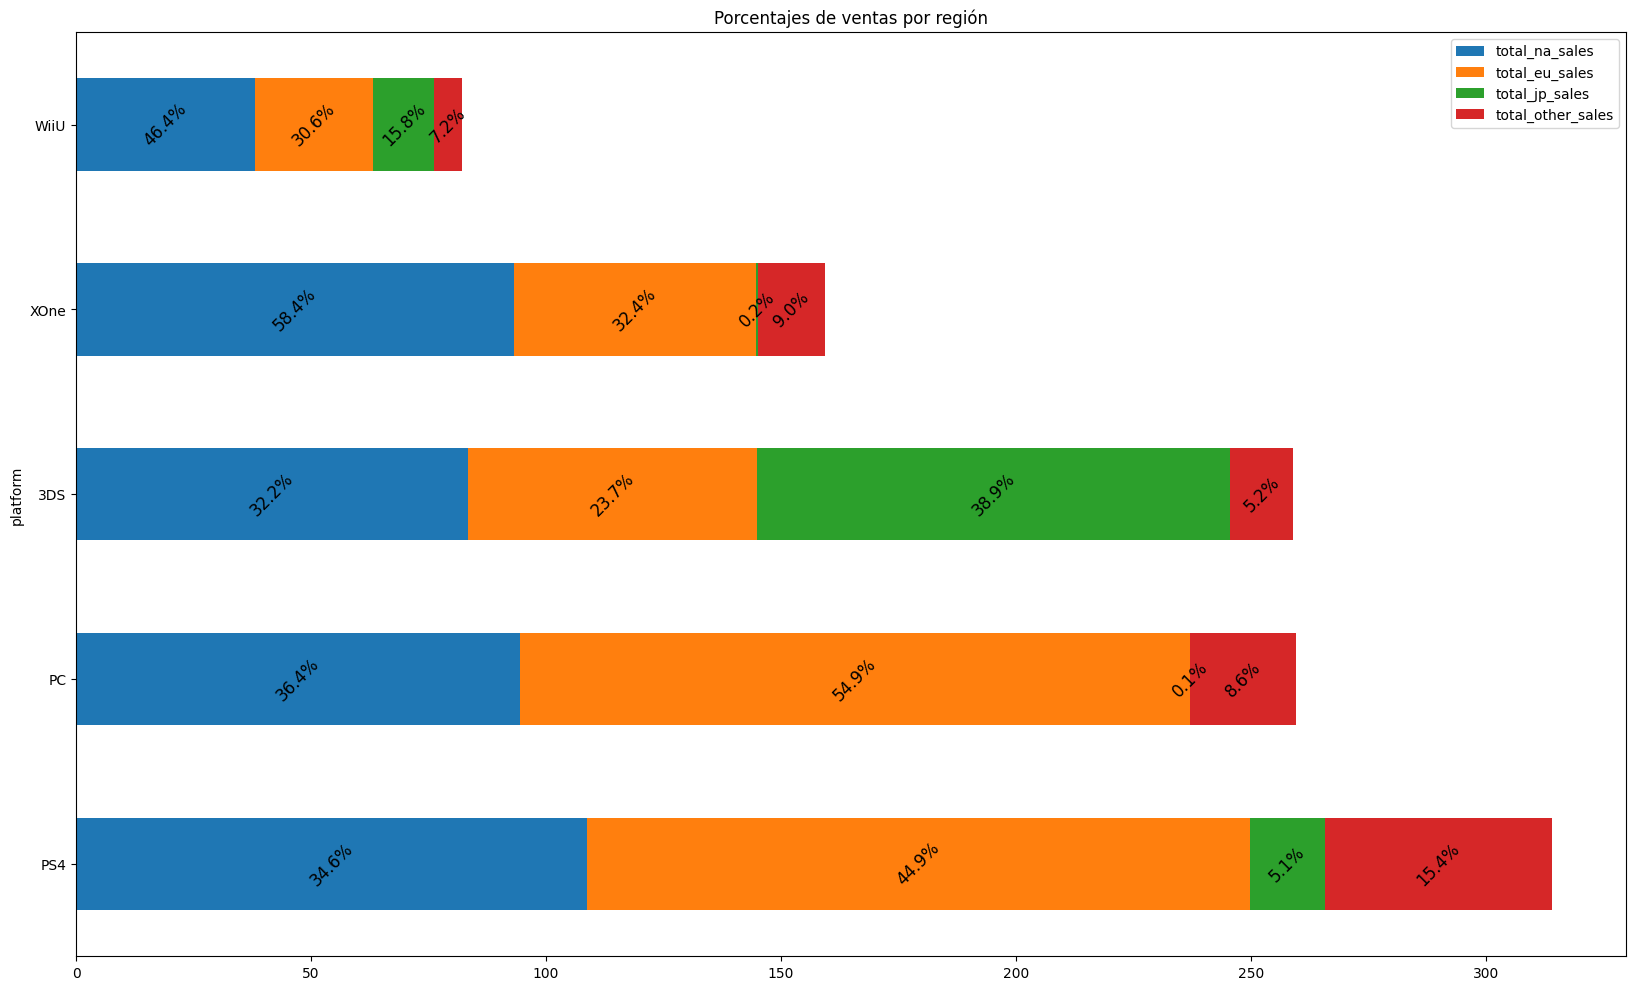

In [92]:
# Se filtra el dataset 'games' para obtner la información de las plataformas de interés
platforms = ['PS4',
             'XOne',
             '3DS',
             'PC',
             'WiiU']

platforms_to_analyse = games[games['platform'].isin(platforms)]

print(f"-- Una muestra del dataset 'platforms_to_analyse':\n\n{platforms_to_analyse.head(5)}")
print()

# Se calculan las ventas totales para cada región
share_market = platforms_to_analyse.groupby(by='platform').agg(
    total_na_sales=('na_sales', 'sum'),
    total_eu_sales=('eu_sales', 'sum'),
    total_jp_sales=('jp_sales', 'sum'),
    total_other_sales=('other_sales', 'sum'),
    total_sales=('total_sales', 'sum')
    ).reset_index().round(2).sort_values(by='total_sales', ascending=False)

print(f"-- Ventas totales por plataforma y por región:\n\n{share_market.head()}")
print()

# se grafica el resultado de las ventas por región
share_market[['platform', 'total_na_sales', 'total_eu_sales', 'total_jp_sales', 'total_other_sales']].plot( 
    x = 'platform', 
    kind = 'barh', 
    stacked = True, 
    title = 'Porcentajes de ventas por región', 
    mark_right = True,
    figsize=(20,12)
)
# Se calcula el porcentaje de ventas de cada región
share_market_region = share_market[share_market.columns[1:5]].div(share_market['total_sales'], 0) * 100

# Se agrega el texto del porcentaje al gráfico de barras generado
for n in share_market_region: 
    for i, (cs, ab, pc) in enumerate(zip(share_market.iloc[:, 1:].cumsum(1)[n],  
                                         share_market[n], share_market_region[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center', rotation = 45, fontsize = 12)

plt.show()

#### Conclusiones

- Las plataformas *PS4* y *PC* lideran en Europa, seguidos por Norte américa.
- La plataforma *3DS* casi que divide sus ingresos entre Norte américa, Europa y Japón.
- *XOne* tiene su principal mercado en Norte américa donde es líder absoluto, luego su segundo principal mercado está en Europa.
- La plataforma *WiiU* es líder en el mercado norte americano, seguipo por Europa.
- De las cinco plataformas analizadas se observa que la paltaforma *PS4* tiene mejor distribución de sus ventas en todas las regiones, menos en Japón donde sus ventas son más bajas.

### Cuotas de mercado de en cada región de acuerdo al género del juego

Para este análisis se trabajará con las siguientes géneros:

1. Action
2. Sports
3. Shooter
4. Role-Playing
5. Platform

Estos son los cinco géneros con el mayor número de ventas totales.

-- Una muestra del dataset 'genres_to_analyse':

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
6     New Super Mario Bros.       DS             2006      Platform     11.28   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN     RP   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN     RP   
6      9.14      6.50         2.88          89.0         8.5      E   

   total_sales  
0        82.54  
1  

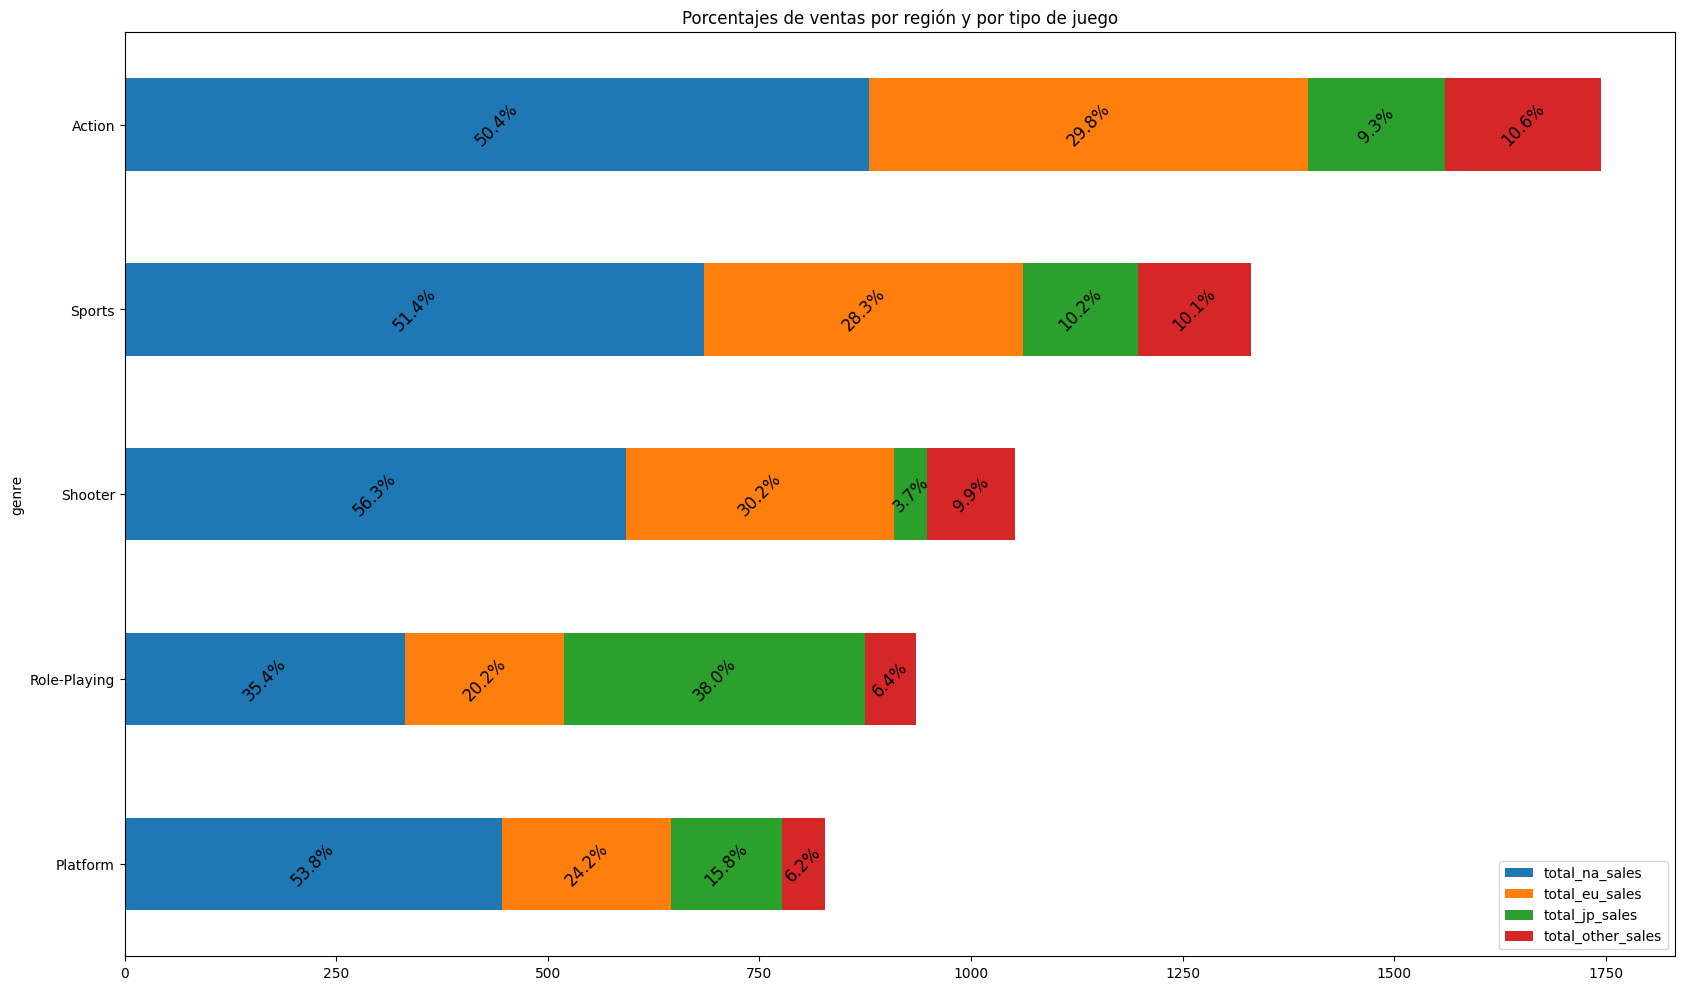

In [93]:
# Se filtra el dataset 'games' para obtener la información de los generos de interés
genres = ['Action',
             'Sports',
             'Shooter',
             'Role-Playing',
             'Platform']

genres_to_analyse = games[games['genre'].isin(genres)]

print(f"-- Una muestra del dataset 'genres_to_analyse':\n\n{genres_to_analyse.head(5)}")
print()

# Se calculan las ventas totales para cada región de acuerdo al género del juego
share_market_2 = genres_to_analyse.groupby(by='genre').agg(
    total_na_sales=('na_sales', 'sum'),
    total_eu_sales=('eu_sales', 'sum'),
    total_jp_sales=('jp_sales', 'sum'),
    total_other_sales=('other_sales', 'sum'),
    total_sales=('total_sales', 'sum')
    ).reset_index().round(2).sort_values(by='total_sales', ascending=True)

print(f"-- Ventas totales por género y por región:\n\n{share_market_2.head()}")
print()

# se grafica el resultado de las ventas por región y por género
share_market_2[['genre', 'total_na_sales', 'total_eu_sales', 'total_jp_sales', 'total_other_sales']].plot( 
    x = 'genre', 
    kind = 'barh', 
    stacked = True, 
    title = 'Porcentajes de ventas por región y por tipo de juego', 
    mark_right = True,
    figsize=(20,12)
)
# Se calcula el porcentaje de ventas de cada región
share_market_region_2 = share_market_2[share_market_2.columns[1:5]].div(share_market_2['total_sales'], 0) * 100

# Se agrega el texto del porcentaje al gráfico de barras generado
for n in share_market_region_2: 
    for i, (cs, ab, pc) in enumerate(zip(share_market_2.iloc[:, 1:].cumsum(1)[n],  
                                         share_market_2[n], share_market_region_2[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center', rotation = 45, fontsize = 12)

plt.show()

#### Conclusiones

- Los juegos de acción tienen mejores venta en Norte américa, y luego en Europa.
- Los juegos deportivos también lideran en Norte américa, seguidos por Europa.
- Los juego de tiradores también lideran en ventas en Norte américa, seguidos por Europa.
- En Japón lideran las ventas los juegos de roles.
- Y los juego de plataformas tambiénm lideran en ventas en Norte américa.
- Desglosando las ventas por el género del juego, se observa que Norte américa es el mercado con mayor participación en las ventas. En cambio si se analiza por plataforma las ventas están mas distribuidas entre regiones.
- Esto se puede presentar a que en el mercado norte americano los usuarios consumen mas juegos que en otros mercados.

### Ventas por clasificaciones ESRB

In [94]:
# Se calculan las ventas totales para cada región de acuerdo a la clasificación
share_market_3 = games.groupby(by='rating').agg(
    total_na_sales=('na_sales', 'sum'),
    total_eu_sales=('eu_sales', 'sum'),
    total_jp_sales=('jp_sales', 'sum'),
    total_other_sales=('other_sales', 'sum'),
    total_sales=('total_sales', 'sum')
    ).reset_index().round(2).sort_values(by='total_sales', ascending=False)

print(f"-- Ventas totales por rating y por región:\n\n{share_market_3.head(10)}")
print()


# Se grafica el resultado obtenido
fig_na = px.bar(share_market_3,
                     x = 'rating',
                     y = 'total_na_sales',
                     color = 'rating',
                     title = 'Ventas totales en Norte américa por clasificación del juego.',
                     labels = {'rating': 'Clasificación del juego', 'total_sales': 'Ventas totales [Millones usd]'})

fig_na.show()

fig_eu = px.bar(share_market_3,
                     x = 'rating',
                     y = 'total_eu_sales',
                     color = 'rating',
                     title = 'Ventas totales en Europa por clasificación del juego.',
                     labels = {'rating': 'Clasificación del juego', 'total_sales': 'Ventas totales [Millones usd]'})

fig_eu.show()

fig_jp = px.bar(share_market_3,
                     x = 'rating',
                     y = 'total_jp_sales',
                     color = 'rating',
                     title = 'Ventas totales en Japón por clasificación del juego.',
                     labels = {'rating': 'Clasificación del juego', 'total_sales': 'Ventas totales [Millones usd]'})

fig_jp.show()

fig_other = px.bar(share_market_3,
                     x = 'rating',
                     y = 'total_other_sales',
                     color = 'rating',
                     title = 'Ventas totales en otras regiones por clasificación del juego.',
                     labels = {'rating': 'Clasificación del juego', 'total_sales': 'Ventas totales [Millones usd]'})

fig_other.show()

fig_total = px.bar(share_market_3,
                     x = 'rating',
                     y = 'total_sales',
                     color = 'rating',
                     title = 'Ventas totales por clasificación del juego.',
                     labels = {'rating': 'Clasificación del juego', 'total_sales': 'Ventas totales [Millones usd]'})

fig_total.show()


-- Ventas totales por rating y por región:

  rating  total_na_sales  total_eu_sales  total_jp_sales  total_other_sales  \
6     RP         1240.68          613.38          841.93             151.01   
1      E         1292.99          710.25          198.11             234.17   
7      T          759.75          427.03          151.40             155.17   
5      M          748.48          483.97           64.24             177.10   
2   E10+          353.32          188.52           40.20              73.56   
4    K-A            2.56            0.27            1.46               0.03   
0     AO            1.26            0.61            0.00               0.09   
3     EC            1.53            0.11            0.00               0.11   

   total_sales  
6      2847.00  
1      2435.52  
7      1493.35  
5      1473.79  
2       655.60  
4         4.32  
0         1.96  
3         1.75  



#### Conclusiones

- La categoría mas vendida en todas las es la `'E (Everyone)'`, que es un tipo de juego aptop para toda persona mayor de 6 años.
- Las categorías `'K-A'`, `'AO'` y `'EC'` apenas reportan ventas en el marcado norte americano, y es testimonial en Europa y otras regiones.
- Las categorías `'AO (Adults Only)'` y `'EC (Early Childhood)'` no se venden en Japón.
- Del dataset orignal se contaba con una gran cantidad de juegos sin información del rating, y que fue completada con la categoría `'RP'`, por eso la categoría `'RP (Rating Pending)'` lidera las ventas en todas las regiones.

## Paso 5: Prueba de hipótesis

Se probarán las siguientes hipótesis:

    1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Hipotésis nula y alternativa:
     * $H_0$: Las calificaciones promedio de los usuarios es igual para las plataformas `'XOne'` y `'PC'`.
     * $H_1$: Las calificaicones promedio de los usuarios es diferente para las paltformas `'XOne'` y `'PC'`.

- Consideraciones:
    - La hpótesis nula se plantea porque parttimos de la idea de que no hay diferencia entre los dos grupos que se van a estudiar. En este caso las calificaciones de los ususrios para las plataformas de juego `'XOne'` y `'PC'`.
    - La hipótesis alternativa se plantea a partir de la hipótesis nula.
    - Se define el valor $\alpha = 0.05$

#### Obtener los datos

In [95]:
# A partir del dataset 'games' se filtra el dataset para obtner la información de las plataformas y las 
# calificaciones de usuario. No se tienen en cuaenta los datos ausentes en la columna games['user_score']
xone_user_score = games[(games['platform'] == 'XOne') & ~(games['user_score'].isna())]
print(f"-- Una muestra del dataset 'xone_user_score':\n\n{xone_user_score.head()}")
print()

# Se realiza el mismo procedimiento para obtener la información de la plataforma 'PC'
pc_user_score = games[(games['platform'] == 'PC') & ~(games['user_score'].isna())]
print(f"-- Una muestra del dataset 'pc_user_score':\n\n{pc_user_score.head()}")

-- Una muestra del dataset 'xone_user_score':

                               name platform  year_of_release         genre  \
165              Grand Theft Auto V     XOne             2014        Action   
179  Call of Duty: Advanced Warfare     XOne             2014       Shooter   
242               Halo 5: Guardians     XOne             2015       Shooter   
270                       Fallout 4     XOne             2015  Role-Playing   
373         Assassin's Creed: Unity     XOne             2014        Action   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
165      2.81      2.19      0.00         0.47          97.0         7.9   
179      3.22      1.55      0.01         0.48          81.0         5.4   
242      2.78      1.27      0.03         0.41          84.0         6.4   
270      2.51      1.32      0.01         0.38          88.0         6.2   
373      2.27      0.90      0.00         0.33          72.0         4.1   

    rating  total_sal

#### Filtrar datos atípicos

In [96]:
# Se encuentran y eliminan los valores atípicos de los dataset obtenidos en el paso anterior

# Se obtienen los rangos intercuartílicos para cada dataset
q1_xone = xone_user_score['user_score'].quantile(q=0.25)
q3_xone = xone_user_score['user_score'].quantile(q=0.75)
iqr_xone = xone_user_score['user_score'].apply(st.iqr)

q1_pc = pc_user_score['user_score'].quantile(q=0.25)
q3_pc = pc_user_score['user_score'].quantile(q=0.75)
iqr_pc = pc_user_score['user_score'].apply(st.iqr)

# Se filtra el dataset  'xone_user_score' para eliminar los valores atípicos
xone_user_score_clean = xone_user_score[~((xone_user_score['user_score'] < (q1_xone-1.5*iqr_xone)) |
                                          (xone_user_score['user_score'] > (q3_xone+1.5*iqr_xone)))]

print(f"-- Una muestra del dataset 'xone_user_score' sin valores atípicos: \n{xone_user_score_clean.head(5)}")
print()

# Se filtra el dataset  'pc_user_score' para eliminar los valores atípicos
pc_user_score_clean = pc_user_score[~((pc_user_score['user_score'] < (q1_pc-1.5*iqr_pc)) |
                                          (pc_user_score['user_score'] > (q3_pc+1.5*iqr_pc)))]

print(f"-- Una muestra del dataset 'pc_user_score' sin valores atípicos: \n{pc_user_score_clean.head(5)}")
print()

-- Una muestra del dataset 'xone_user_score' sin valores atípicos: 
                                  name platform  year_of_release  \
242                  Halo 5: Guardians     XOne             2015   
270                          Fallout 4     XOne             2015   
413     Gears of War: Ultimate Edition     XOne             2015   
422  Halo: The Master Chief Collection     XOne             2014   
484                          Titanfall     XOne             2014   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
242       Shooter      2.78      1.27      0.03         0.41          84.0   
270  Role-Playing      2.51      1.32      0.01         0.38          88.0   
413       Shooter      2.61      0.33      0.00         0.34          82.0   
422       Shooter      1.91      1.00      0.03         0.29          85.0   
484       Shooter      1.84      0.80      0.04         0.27          86.0   

     user_score rating  total_sales  
242         6.4 

#### Descripción estadística de los datasets

    1. Se observa la distribución de las puntuaciones de los usuarios para cada plataforma.
    2. Se calcula la media, la mediana y la varianza de la calificación de los usuarios para cada plataforma.
    3. Se crea un box plot para cada plataforma.

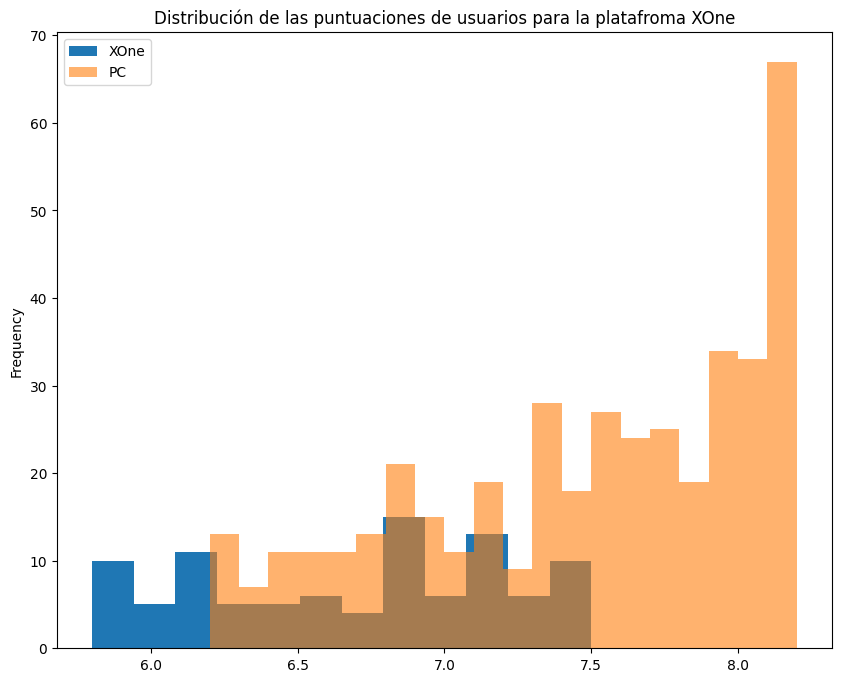

In [97]:
# Distribución de las puntuaciones
xone_user_score_clean['user_score'].plot(
    kind='hist',
    bins=12,
    title="Distribución de las puntuaciones de usuarios para la platafroma XOne",
    xlabel='Puntuaciones',
    ylabel='Frecuencia',
    figsize=(10, 8)
    

)
pc_user_score_clean['user_score'].plot(
    kind='hist',
    bins=20,
    alpha=0.6
)

plt.legend(['XOne', 'PC'])
plt.show()

In [98]:
# Calcula la media, la varianza y la mediana de las calificaciones de los usuarios para cada plataforma

# Se calcula el promedio de la calificación para XOne
print(f"-- Puntuación promedio de los usuarios para 'XOne': {xone_user_score_clean['user_score'].mean():.2f}")
print()

# Se calcula la mediana 
print(f"-- Mediana de la puntuación de los usuarios para 'XOne': {xone_user_score_clean['user_score'].median():.2f}")
print()

# Se calcula la varianza
print(f"-- Varianza la puntuación de los usuarios para 'XOne': {np.var(xone_user_score_clean['user_score']):.2f}")
print()

# Se calcula el promedio de la calificación para PC
print(f"-- Puntuación promedio de los usuarios para 'PC': {pc_user_score_clean['user_score'].mean():.2f}")
print()

# Se calcula la mediana 
print(f"-- Mediana de la puntuación de los usuarios para 'PC': {pc_user_score_clean['user_score'].median():.2f}")
print()

# Se calcula la varianza
print(f"-- Varianza la puntuación de los usuarios para 'PC': {np.var(pc_user_score_clean['user_score']):.2f}")
print()

-- Puntuación promedio de los usuarios para 'XOne': 6.69

-- Mediana de la puntuación de los usuarios para 'XOne': 6.80

-- Varianza la puntuación de los usuarios para 'XOne': 0.27

-- Puntuación promedio de los usuarios para 'PC': 7.43

-- Mediana de la puntuación de los usuarios para 'PC': 7.50

-- Varianza la puntuación de los usuarios para 'PC': 0.34



In [99]:
# Se crea un boxplot para el ingreso en cada región
print("-- Diagrama de cajas para la puntuación de los usuarios para XOne:\n")
box_xone = px.box(x = xone_user_score_clean['user_score'], notched=True,
                title = 'Distribución de las puntuaciones de los usuarios para XOne', points = 'all',
                labels = {'x': 'Puntuaciones'})

box_xone.show()

print("-- Diagrama de cajas para la puntuación de los usuarios para PC:\n")
box_pc = px.box(x = pc_user_score_clean['user_score'], notched=True,
                title = 'Distribución de las puntuaciones de los usuarios para PC', points = 'all',
                labels = {'x': 'Puntuaciones'})

box_pc.show()

-- Diagrama de cajas para la puntuación de los usuarios para XOne:



-- Diagrama de cajas para la puntuación de los usuarios para PC:



#### Prueba de la hipótesis

In [100]:
# Se realiza la prueba de hipótesis considerando que los dos datasets a comparar tienen varianzas diferentes

# Se establece el valor  alpha en 0.05
alpha = 0.05

result_mean_platform = st.ttest_ind(xone_user_score_clean['user_score'],
                                   pc_user_score_clean['user_score'],
                                   equal_var=False)
print('Valor p:', result_mean_platform.pvalue)
print()

# Se compara el valor 'p' obtenido con el nivel de significacion estadistica
if result_mean_platform.pvalue < alpha:
    print("Se rechaza la hipótesis nula.")
else:
    print("No se puede rechazar la hipótesis nula.")
print()

Valor p: 1.1127581111913473e-24

Se rechaza la hipótesis nula.



### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Hipotésis nula y alternativa:
     * $H_0$: Las calificaciones promedio de los usuarios es igual para los géneros `'Action'` y `'Sports'`.
     * $H_1$: Las calificaciones promedio de los usuarios es diferente para las paltformas `'Action'` y `'Sports'`.

- Consideraciones:
    - La hpótesis nula se plantea porque partimos de la idea de que no hay diferencia entre los dos grupos que se van a estudiar. En este caso las calificaciones de los usuarios para las géneros de juego `'Action'` y `'Sports'`.
    - La hipótesis alternativa se plantea a partir de la hipótesis nula.
    - Se define el valor $\alpha = 0.05$

#### Obtener los datos

In [101]:
# A partir del dataset 'games' se obtiene la información de los géneros y las calificaciones de usuario.
# No se tienen en cuaenta los datos ausentes en la columna games['user_score']

action_user_score = games[(games['genre'] == 'Action') & ~(games['user_score'].isna())]
print(f"-- Una muestra del dataset 'action_user_score':\n\n{action_user_score.head()}")
print()

# Se realiza el mismo procedimiento para obtener la información de la plataforma 'PC'
sports_user_score = games[(games['genre'] == 'Sports') & ~(games['user_score'].isna())]
print(f"-- Una muestra del dataset 'sports_user_score':\n\n{sports_user_score.head()}")

-- Una muestra del dataset 'action_user_score':

                             name platform  year_of_release   genre  na_sales  \
16             Grand Theft Auto V      PS3             2013  Action      7.02   
17  Grand Theft Auto: San Andreas      PS2             2004  Action      9.43   
23             Grand Theft Auto V     X360             2013  Action      9.66   
24    Grand Theft Auto: Vice City      PS2             2002  Action      8.41   
38           Grand Theft Auto III      PS2             2001  Action      6.99   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16      9.09      0.98         3.96          97.0         8.2      M   
17      0.40      0.41        10.57          95.0         9.0      M   
23      5.14      0.06         1.41          97.0         8.1      M   
24      5.49      0.47         1.78          95.0         8.7      M   
38      4.51      0.30         1.30          97.0         8.5      M   

    total_sales  
16        21.

#### Filtrar datos atípicos

In [102]:
# Se encuentran y eliminan los valores atípicos de los dataset obtenidos en el paso anterior

# Se obtienen los rangos intercuartílicos para cada dataset
q1_action = action_user_score['user_score'].quantile(q=0.25)
q3_action = action_user_score['user_score'].quantile(q=0.75)
iqr_action = action_user_score['user_score'].apply(st.iqr)

q1_sports = sports_user_score['user_score'].quantile(q=0.25)
q3_sports = sports_user_score['user_score'].quantile(q=0.75)
iqr_sports = sports_user_score['user_score'].apply(st.iqr)

# Se filtra el dataset  'action_user_score' para eliminar los valores atípicos
action_user_score_clean = action_user_score[~((action_user_score['user_score'] < (q1_action-1.5*iqr_action)) |
                                          (action_user_score['user_score'] > (q3_action+1.5*iqr_action)))]

print(f"-- Una muestra del dataset 'action_user_score' sin valores atípicos: \n{action_user_score_clean.head(5)}")
print()

# Se filtra el dataset  'sports_user_score' para eliminar los valores atípicos
sports_user_score_clean = sports_user_score[~((sports_user_score['user_score'] < (q1_sports-1.5*iqr_sports)) |
                                          (sports_user_score['user_score'] > (q3_sports+1.5*iqr_sports)))]

print(f"-- Una muestra del dataset 'sports_user_score' sin valores atípicos: \n{sports_user_score_clean.head(5)}")
print()

-- Una muestra del dataset 'action_user_score' sin valores atípicos: 
                                      name platform  year_of_release   genre  \
23                      Grand Theft Auto V     X360             2013  Action   
51                     Grand Theft Auto IV     X360             2008  Action   
57                     Grand Theft Auto IV      PS3             2008  Action   
81                          FIFA Soccer 13      PS3             2012  Action   
91  Grand Theft Auto: Liberty City Stories      PSP             2005  Action   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
23      9.66      5.14      0.06         1.41          97.0         8.1   
51      6.76      3.07      0.14         1.03          98.0         7.9   
57      4.76      3.69      0.44         1.61          98.0         7.5   
81      1.06      5.01      0.13         1.97          88.0         6.6   
91      2.90      2.81      0.24         1.73          88.0         7.6   

#### Descripción estadística de los datasets

    1. Se observa la distribución de las puntuaciones de los usuarios para cada plataforma.
    2. Se calcula la media, la mediana y la varianza de la calificación de los usuarios para cada plataforma.
    3. Se crea un box plot para cada plataforma.

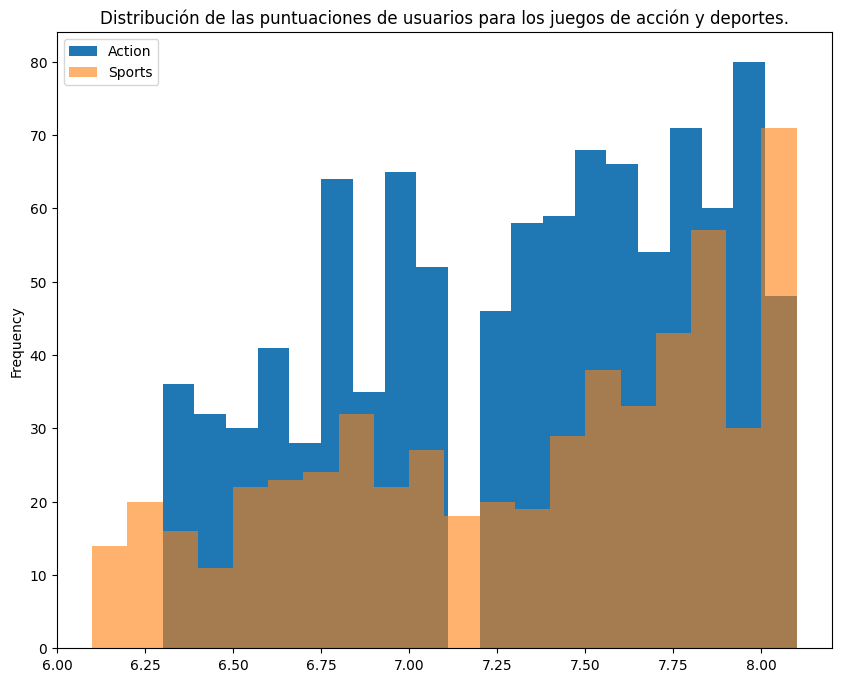

In [103]:
# Distribución de las puntuaciones
action_user_score_clean['user_score'].plot(
    kind='hist',
    bins=20,
    title="Distribución de las puntuaciones de usuarios para los juegos de acción y deportes.",
    xlabel='Puntuaciones',
    ylabel='Frecuencia',
    figsize=(10, 8)
    

)
sports_user_score_clean['user_score'].plot(
    kind='hist',
    bins=20,
    alpha=0.6
)

plt.legend(['Action', 'Sports'])
plt.show()

In [104]:
# Calcula la media, la varianza y la mediana de las calificaciones de los usuarios para cada plataforma

# Se calcula el promedio de la calificación para Action
print(f"-- Puntuación promedio de los usuarios para 'Action': {action_user_score_clean['user_score'].mean():.2f}")
print()

# Se calcula la mediana 
print(f"-- Mediana de la puntuación de los usuarios para 'Action': {action_user_score_clean['user_score'].median():.2f}")
print()

# Se calcula la varianza
print(f"-- Varianza la puntuación de los usuarios para 'Action': {np.var(action_user_score_clean['user_score']):.2f}")
print()

# Se calcula el promedio de la calificación para Sports
print(f"-- Puntuación promedio de los usuarios para 'Sports': {sports_user_score_clean['user_score'].mean():.2f}")
print()

# Se calcula la mediana 
print(f"-- Mediana de la puntuación de los usuarios para 'Sports': {sports_user_score_clean['user_score'].median():.2f}")
print()

# Se calcula la varianza
print(f"-- Varianza la puntuación de los usuarios para 'Sports': {np.var(sports_user_score_clean['user_score']):.2f}")
print()

-- Puntuación promedio de los usuarios para 'Action': 7.31

-- Mediana de la puntuación de los usuarios para 'Action': 7.40

-- Varianza la puntuación de los usuarios para 'Action': 0.27

-- Puntuación promedio de los usuarios para 'Sports': 7.27

-- Mediana de la puntuación de los usuarios para 'Sports': 7.40

-- Varianza la puntuación de los usuarios para 'Sports': 0.34



In [105]:
# Se crea un boxplot para el ingreso en cada región
print("-- Diagrama de cajas para la puntuación de los usuarios para Action:\n")
box_action = px.box(x = action_user_score_clean['user_score'], notched=True,
                title = 'Distribución de las puntuaciones de los usuarios para los juegos de acción', points = 'all',
                labels = {'x': 'Puntuaciones'})

box_action.show()

print("-- Diagrama de cajas para la puntuación de los usuarios para Sports:\n")
box_sports = px.box(x = sports_user_score_clean['user_score'], notched=True,
                title = 'Distribución de las puntuaciones de los usuarios para los juegos de deportes', points = 'all',
                labels = {'x': 'Puntuaciones'})

box_sports.show()

-- Diagrama de cajas para la puntuación de los usuarios para Action:



-- Diagrama de cajas para la puntuación de los usuarios para Sports:



#### Prueba de la hipótesis

In [106]:
# Se realiza la prueba de hipótesis considerando que los dos datasets a comparar tienen varianzas diferentes

# Se establece el valor  alpha en 0.05
alpha = 0.05

result_mean_genre = st.ttest_ind(action_user_score_clean['user_score'],
                                 sports_user_score_clean['user_score'],
                                 equal_var=False)

print('Valor p:', result_mean_genre.pvalue)
print()

# Se compara el valor 'p' obtenido con el nivel de significacion estadistica
if result_mean_genre.pvalue < alpha:
    print("Se rechaza la hipótesis nula.")
else:
    print("No se puede rechazar la hipótesis nula.")
print()

Valor p: 0.20579046888767488

No se puede rechazar la hipótesis nula.



## Conclusiones

- Las plataformas mas rentables son las siguientes:

    1. PS4
    2. XOne
    3. 3DS
    4. PC
    5. WiiU
    6. PSV
    7. PS3
    8. X360
            
- Se puede afirmar que el promedio de las puntuaciones de los usuarios no es igual para las plataformas `'XOne'` y `'PC'`.
- Se puede afirmar que el promedio de las puntuaciones de los usuarios es igual para los juegos de acción y deprotes.
- Es importante tener una estrategia clara para trabajar con datos ausentes.